In [2]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


===== Dataset Summary =====
Training Positive Images: 1000
Training Positive Labels: 1000
Training Negative Images: 1000
Training Negative Labels: 1000
Testing Positive Images: 815
Testing Negative Images: 181


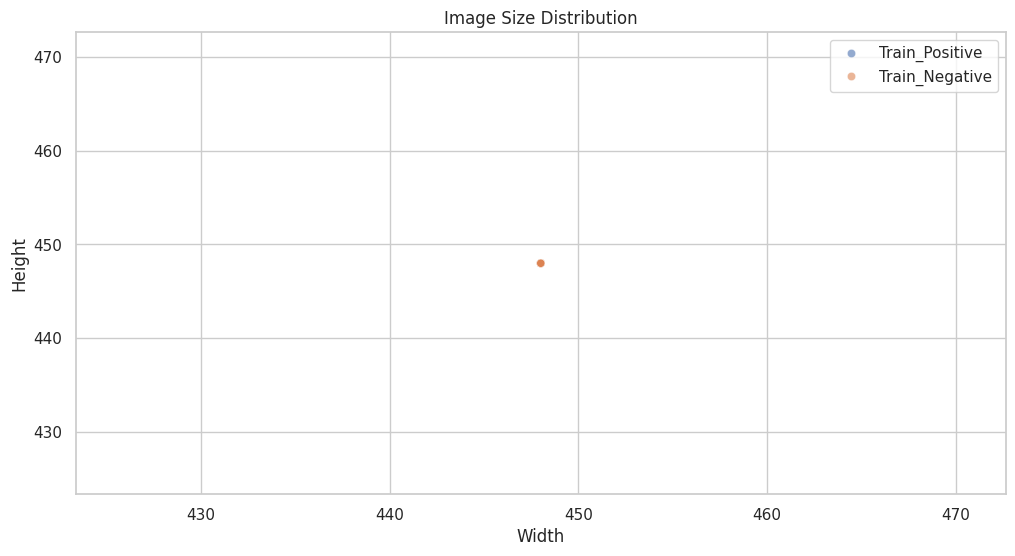


===== Mask Percentage Statistics =====
                 count      mean       std       min       25%       50%  \
Category                                                                   
Train_Negative  1000.0  0.000055  0.001304  0.000000  0.000000  0.000000   
Train_Positive  1000.0  4.596133  3.818182  0.327348  2.213708  3.212442   

                     75%        max  
Category                             
Train_Negative  0.000000   0.037368  
Train_Positive  5.667675  30.469746  

===== Sample Training Positive Images and Masks =====


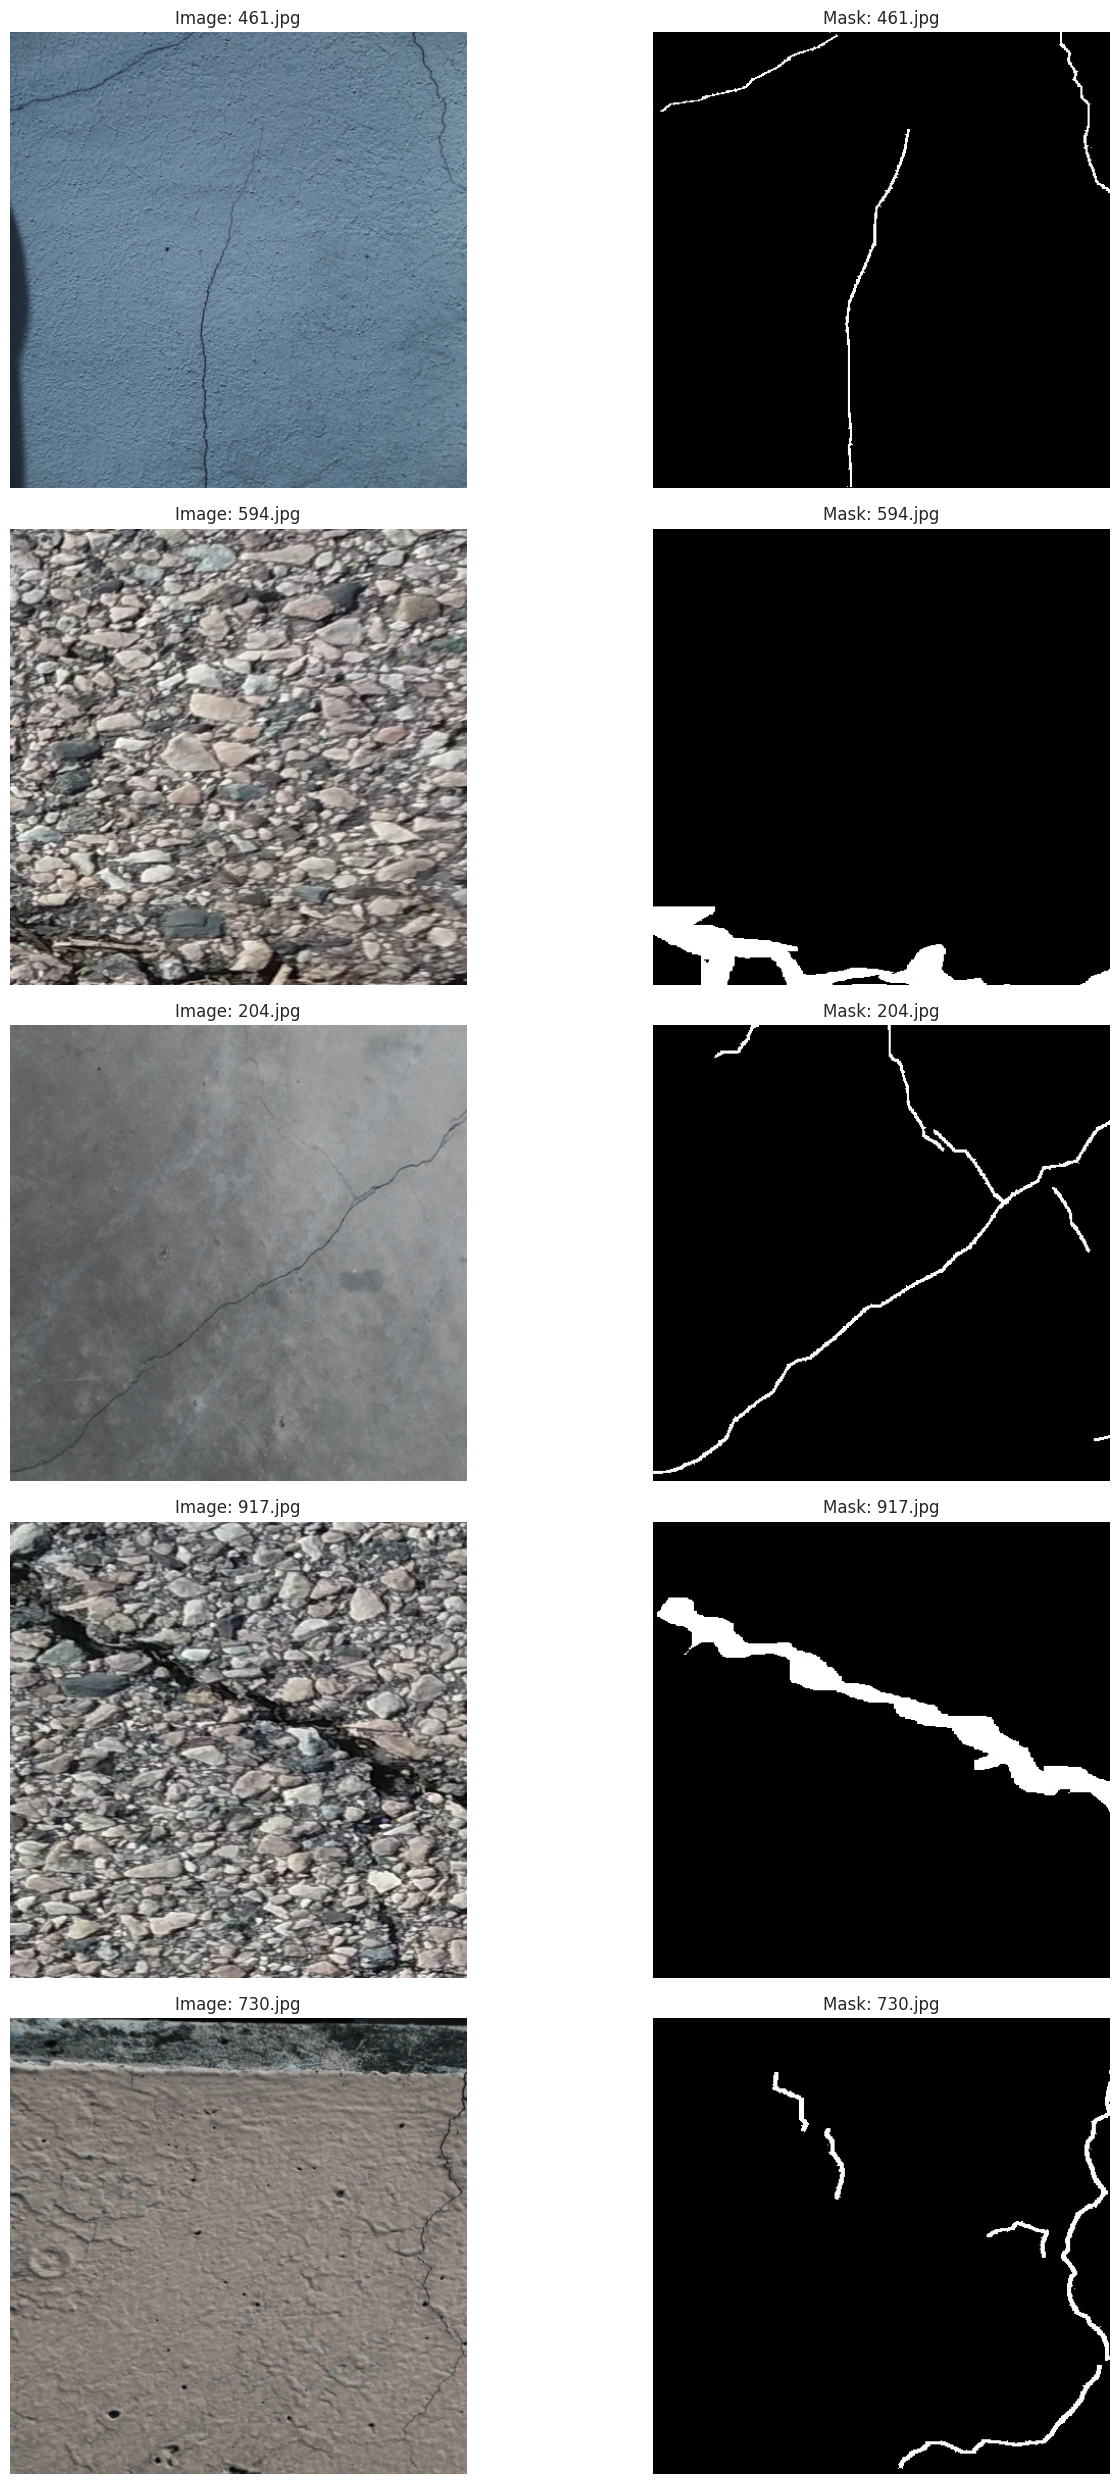


===== Sample Training Negative Images and Masks =====


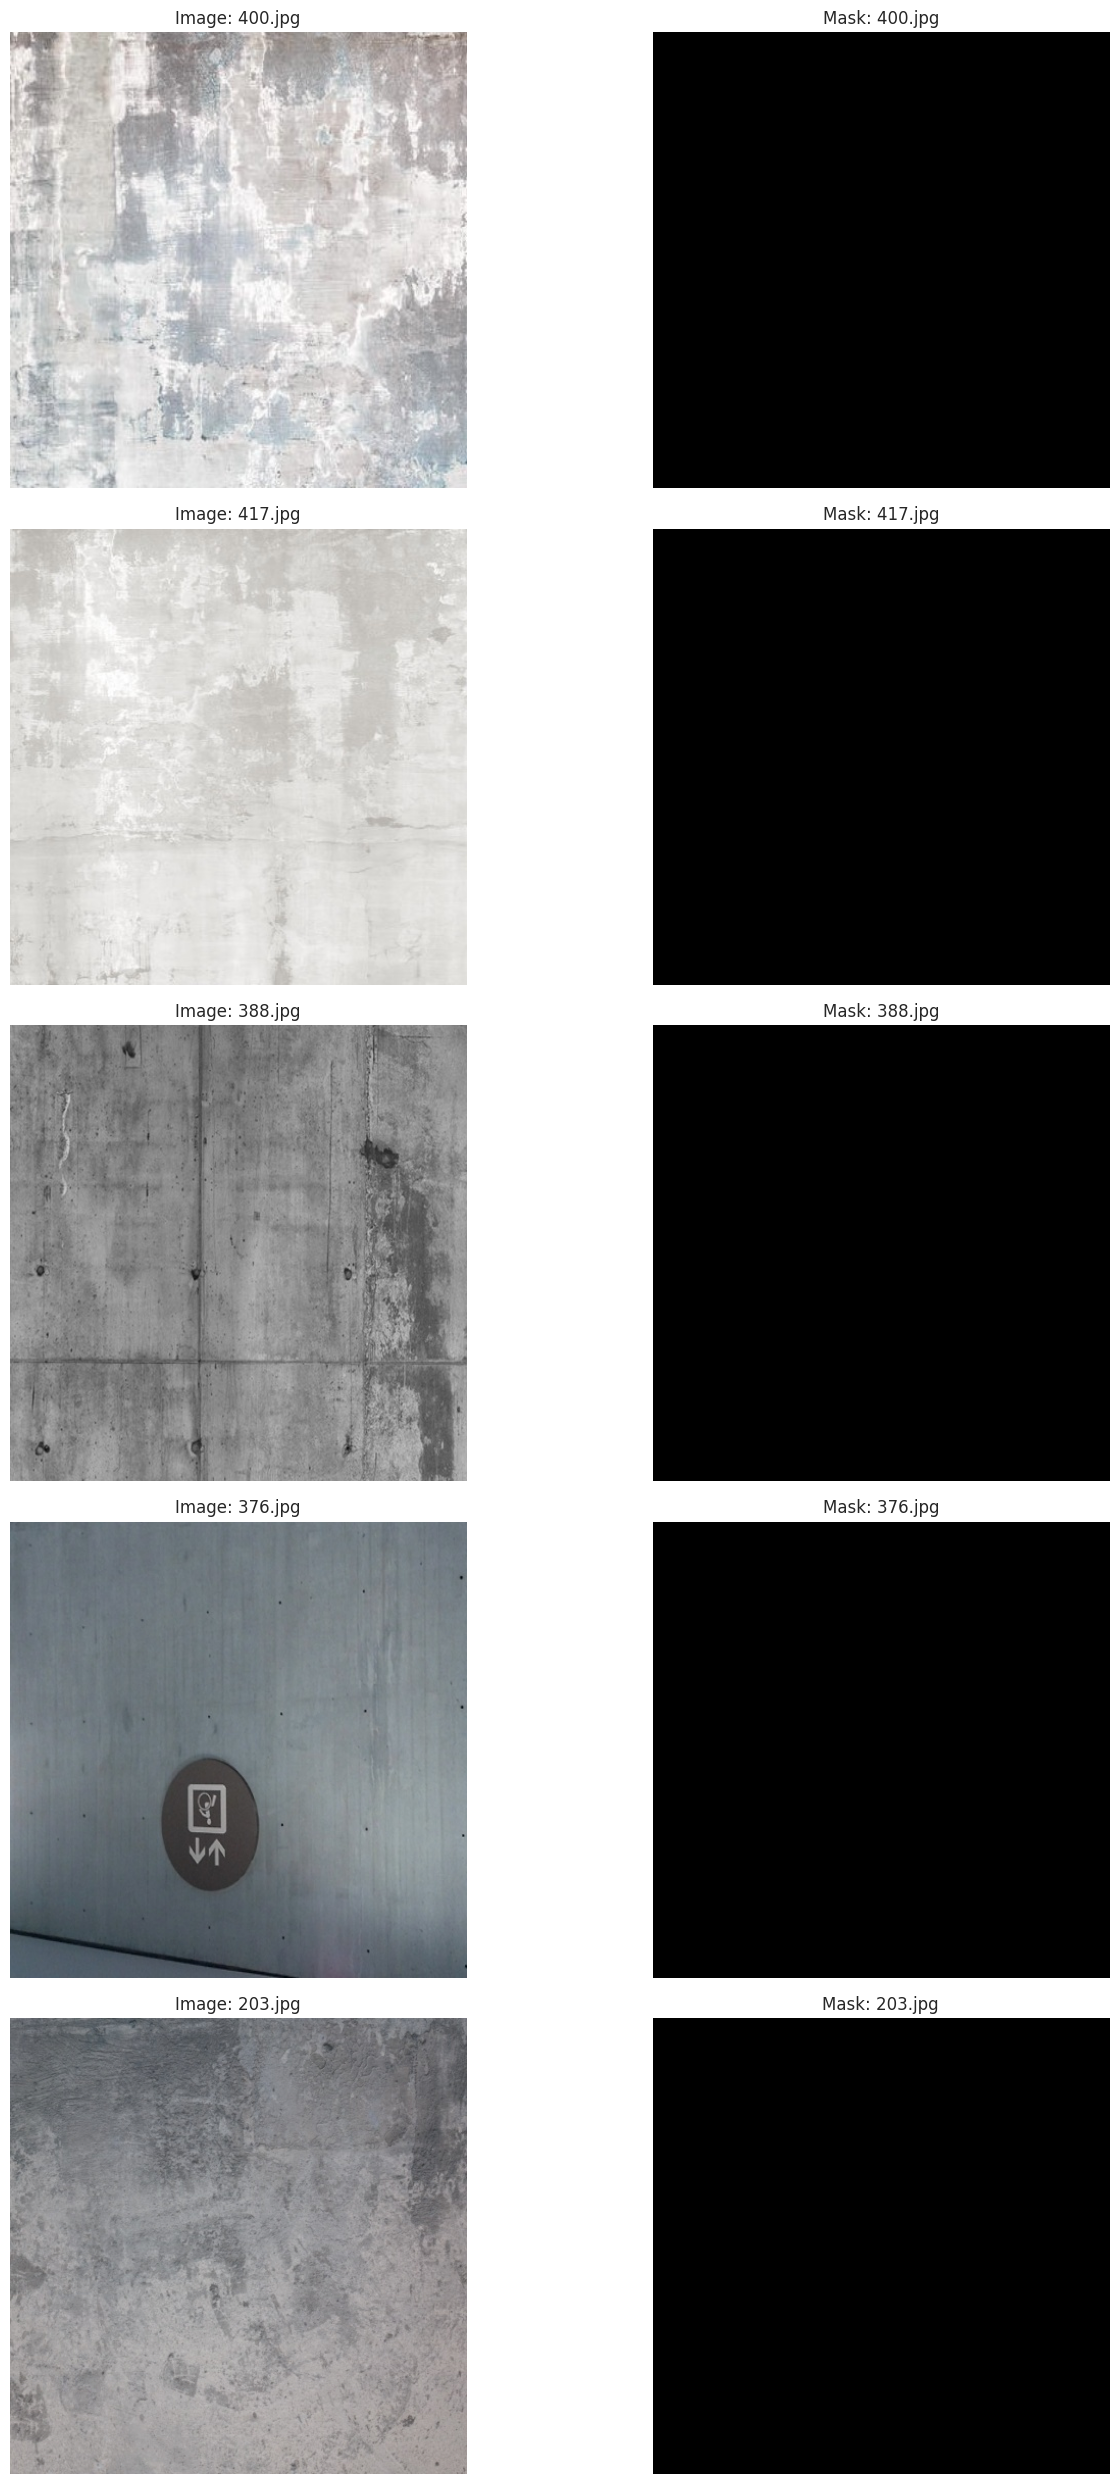

/tmp/ipykernel_3159750/3996673120.py:172: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette='viridis')


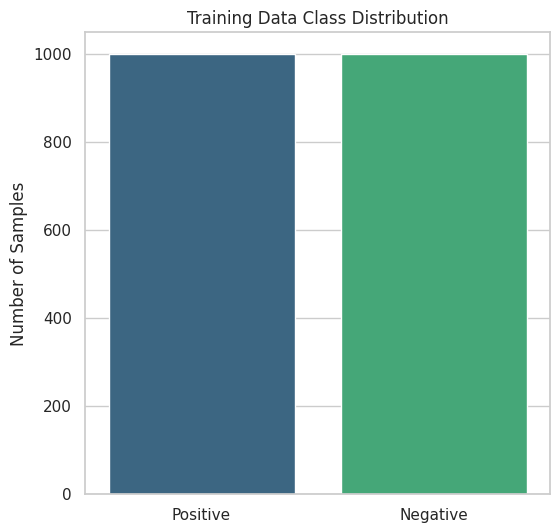


===== Merged Train_Positive DataFrame =====
   Width  Height      Category_x Image_Name  Mask_Percentage      Category_y
0    448     448  Train_Positive      0.jpg         3.961057  Train_Positive
1    448     448  Train_Positive      1.jpg         4.358658  Train_Positive
2    448     448  Train_Positive      2.jpg         9.484116  Train_Positive
3    448     448  Train_Positive      3.jpg         2.135981  Train_Positive
4    448     448  Train_Positive      4.jpg        30.469746  Train_Positive

===== Mask Percentage Statistics for Train_Positive =====
count    1000.000000
mean        4.596133
std         3.818182
min         0.327348
25%         2.213708
50%         3.212442
75%         5.667675
max        30.469746
Name: Mask_Percentage, dtype: float64


/tmp/ipykernel_3159750/3996673120.py:249: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


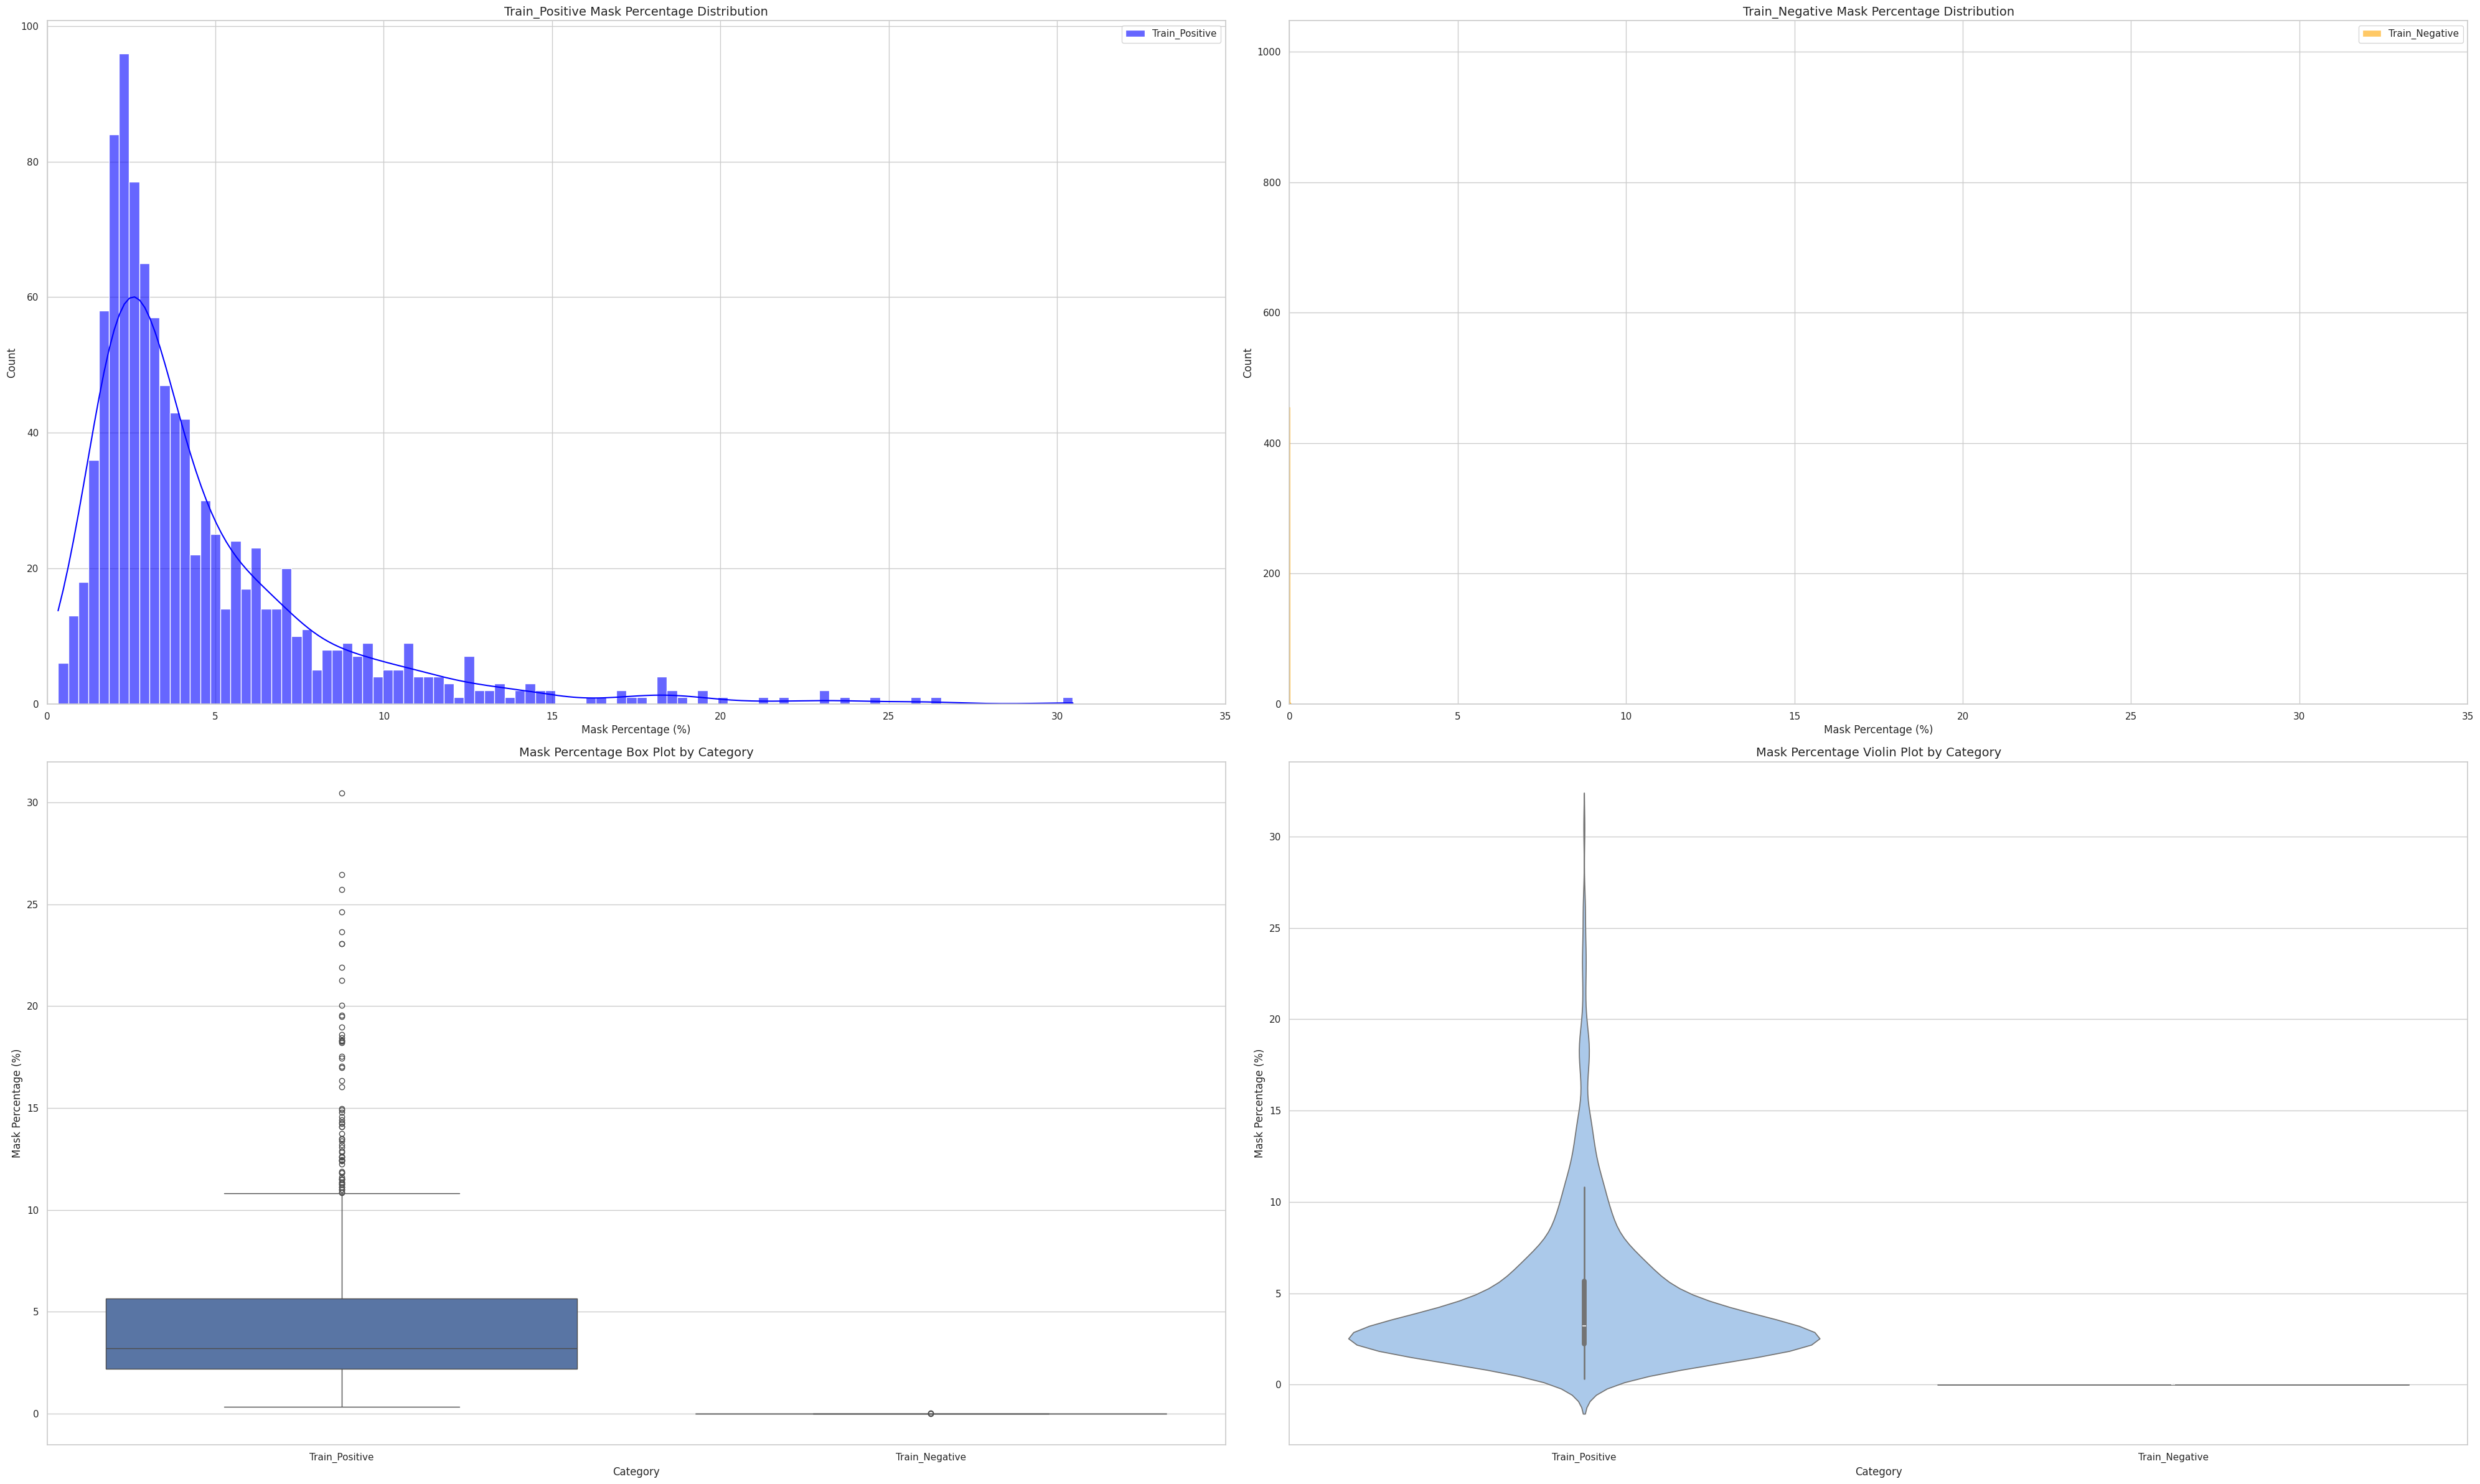

In [3]:
import os
import glob
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn 스타일 설정
sns.set(style="whitegrid")

# 데이터셋 경로 정의
train_positive_image_dir = "/data/hyeongchanim/etc/data/Train/Positive/Image"
train_positive_label_dir = "/data/hyeongchanim/etc/data/Train/Positive/Label"
train_negative_image_dir = "/data/hyeongchanim/etc/data/Train/Negative/Image"
train_negative_label_dir = "/data/hyeongchanim/etc/data/Train/Negative/Label"
test_positive_dir = "/data/hyeongchanim/etc/data/Test/Positive"
test_negative_dir = "/data/hyeongchanim/etc/data/Test/Negative"

# 이미지 파일 경로를 가져오는 함수
def get_image_paths(directory, extensions=['*.jpg', '*.jpeg', '*.png']):
    files = []
    for ext in extensions:
        files.extend(glob.glob(os.path.join(directory, ext)))
    return files

# 학습 데이터 수집
train_pos_images = get_image_paths(train_positive_image_dir)
train_pos_labels = get_image_paths(train_positive_label_dir)
train_neg_images = get_image_paths(train_negative_image_dir)
train_neg_labels = get_image_paths(train_negative_label_dir)

# 테스트 데이터 수집 (필요 시 사용)
test_pos_images = get_image_paths(test_positive_dir)
test_neg_images = get_image_paths(test_negative_dir)

# 데이터셋 요약 출력
print("===== Dataset Summary =====")
print(f"Training Positive Images: {len(train_pos_images)}")
print(f"Training Positive Labels: {len(train_pos_labels)}")
print(f"Training Negative Images: {len(train_neg_images)}")
print(f"Training Negative Labels: {len(train_neg_labels)}")
print(f"Testing Positive Images: {len(test_pos_images)}")
print(f"Testing Negative Images: {len(test_neg_images)}")

# 이미지 크기를 가져오는 함수
def get_image_sizes(image_paths):
    sizes = []
    for img_path in image_paths:
        try:
            with Image.open(img_path) as img:
                sizes.append(img.size)  # (Width, Height)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            sizes.append((np.nan, np.nan))
    return sizes

def calculate_mask_percentages(label_paths, category):
    percentages = []
    for lbl in label_paths:
        pct = mask_percentage(lbl)
        percentages.append(pct)
    df = pd.DataFrame({
        'Mask_Percentage': percentages,
        'Category': category
    })
    return df

# 학습 이미지의 크기 가져오기
train_pos_sizes = get_image_sizes(train_pos_images)
train_neg_sizes = get_image_sizes(train_neg_images)
df_train_pos_masks = calculate_mask_percentages(train_pos_labels, 'Train_Positive')
df_train_neg_masks = calculate_mask_percentages(train_neg_labels, 'Train_Negative')  # Should be near 0%
df_masks = pd.concat([df_train_pos_masks, df_train_neg_masks], ignore_index=True)

# 크기를 분석하기 위한 DataFrame으로 변환
def sizes_to_df(sizes, label):
    df = pd.DataFrame(sizes, columns=['Width', 'Height'])
    df['Category'] = label
    return df

df_train_pos = sizes_to_df(train_pos_sizes, 'Train_Positive')
df_train_neg = sizes_to_df(train_neg_sizes, 'Train_Negative')
df_sizes = pd.concat([df_train_pos, df_train_neg], ignore_index=True)

# 이미지 크기 분포 시각화
plt.figure(figsize=(12,6))
sns.scatterplot(x='Width', y='Height', hue='Category', data=df_sizes, alpha=0.6)
plt.title('Image Size Distribution')  # 영어 제목으로 변경
plt.xlabel('Width')
plt.ylabel('Height')
plt.legend()
plt.show()

# 마스크 통계(균열 픽셀의 비율)를 계산하는 함수
def mask_percentage(mask_path):
    try:
        with Image.open(mask_path) as mask:
            mask = mask.convert('L')  # 그레이스케일로 변환
            mask_np = np.array(mask)
            # 균열은 흰색(255), 배경은 검은색(0)으로 가정
            crack_pixels = np.sum(mask_np > 0)
            total_pixels = mask_np.size
            return (crack_pixels / total_pixels) * 100
    except Exception as e:
        print(f"Error loading mask {mask_path}: {e}")
        return np.nan

# 긍정 및 부정 샘플의 마스크 비율 계산
def calculate_mask_percentages(label_paths, category):
    percentages = []
    for lbl in label_paths:
        pct = mask_percentage(lbl)
        percentages.append(pct)
    df = pd.DataFrame({
        'Mask_Percentage': percentages,
        'Category': category
    })
    return df

# 요약 통계 출력
print("\n===== Mask Percentage Statistics =====")
print(df_masks.groupby('Category')['Mask_Percentage'].describe())

# 샘플 이미지 및 마스크 시각화
def visualize_samples(image_paths, label_paths, num_samples=5):
    if len(image_paths) == 0 or len(label_paths) == 0:
        print("No samples to visualize.")
        return
    indices = np.random.choice(len(image_paths), num_samples, replace=False)
    plt.figure(figsize=(15, num_samples * 5))
    for i, idx in enumerate(indices):
        # 이미지 표시
        plt.subplot(num_samples, 2, 2*i + 1)
        try:
            with Image.open(image_paths[idx]) as img:
                plt.imshow(img)
                plt.title(f"Image: {os.path.basename(image_paths[idx])}")
                plt.axis('off')
        except Exception as e:
            print(f"Error displaying image {image_paths[idx]}: {e}")
            plt.text(0.5, 0.5, 'Image Load Error', horizontalalignment='center', verticalalignment='center')
            plt.axis('off')
        
        # 마스크 표시
        plt.subplot(num_samples, 2, 2*i + 2)
        try:
            with Image.open(label_paths[idx]) as mask:
                plt.imshow(mask, cmap='gray')
                plt.title(f"Mask: {os.path.basename(label_paths[idx])}")
                plt.axis('off')
        except Exception as e:
            print(f"Error displaying mask {label_paths[idx]}: {e}")
            plt.text(0.5, 0.5, 'Mask Load Error', horizontalalignment='center', verticalalignment='center')
            plt.axis('off')
    plt.tight_layout()
    plt.show()

print("\n===== Sample Training Positive Images and Masks =====")
visualize_samples(train_pos_images, train_pos_labels, num_samples=5)

print("\n===== Sample Training Negative Images and Masks =====")
visualize_samples(train_neg_images, train_neg_labels, num_samples=5)

# 클래스 불균형 확인
num_positive = len(train_pos_images)
num_negative = len(train_neg_images)
labels = ['Positive', 'Negative']
counts = [num_positive, num_negative]

plt.figure(figsize=(6,6))
sns.barplot(x=labels, y=counts, palette='viridis')
plt.title('Training Data Class Distribution')
plt.ylabel('Number of Samples')
plt.show()

# 추가 분석: 이미지 크기와 마스크 비율 간의 상관관계
# 긍정 샘플에 대해서만 분석
# 데이터프레임 병합을 파일 이름 기준으로 수행
# Image_Name을 기준으로 병합하여 정확성 보장

# 파일 이름을 기준으로 Image_Name 열 추가
df_train_pos['Image_Name'] = [os.path.basename(path) for path in train_pos_images]
df_train_pos_masks['Image_Name'] = [os.path.basename(path) for path in train_pos_labels]

# 데이터프레임 병합 (Image_Name을 기준으로)
df_train_pos_full = pd.merge(df_train_pos, df_train_pos_masks, on='Image_Name')

# 병합된 데이터프레임의 첫 몇 행 확인
print("\n===== Merged Train_Positive DataFrame =====")
print(df_train_pos_full.head())

# 요약 통계 확인 (추가)
print("\n===== Mask Percentage Statistics for Train_Positive =====")
print(df_train_pos_full['Mask_Percentage'].describe())

# 추가적인 데이터 확인 및 문제 해결을 위한 시각화
# 플롯 스타일 설정 (선택 사항)
sns.set(style="whitegrid")

# 2행 2열의 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(40, 24))  # 필요에 따라 figsize 조정
# 1. Train_Positive Mask Percentage 히스토그램
sns.histplot(
    df_train_pos_full, 
    x='Mask_Percentage', 
    bins=100, 
    kde=True, 
    color='blue', 
    label='Train_Positive', 
    alpha=0.6, 
    ax=axes[0, 0]
)
axes[0, 0].set_title('Train_Positive Mask Percentage Distribution', fontsize=14)
axes[0, 0].set_xlabel('Mask Percentage (%)', fontsize=12)
axes[0, 0].set_ylabel('Count', fontsize=12)
axes[0, 0].set_xlim(0, 35)
axes[0, 0].legend()

# 2. Train_Negative Mask Percentage 히스토그램
sns.histplot(
    df_masks[df_masks['Category'] == 'Train_Negative'], 
    x='Mask_Percentage', 
    bins=100, 
    kde=True, 
    color='orange', 
    label='Train_Negative', 
    alpha=0.6, 
    ax=axes[0, 1]
)
axes[0, 1].set_title('Train_Negative Mask Percentage Distribution', fontsize=14)
axes[0, 1].set_xlabel('Mask Percentage (%)', fontsize=12)
axes[0, 1].set_ylabel('Count', fontsize=12)
axes[0, 1].set_xlim(0, 35)
axes[0, 1].legend()

# 3. Box Plot으로 Mask Percentage 분포 확인
sns.boxplot(
    x='Category', 
    y='Mask_Percentage', 
    data=df_masks, 
    ax=axes[1, 0]
)
axes[1, 0].set_title('Mask Percentage Box Plot by Category', fontsize=14)
axes[1, 0].set_xlabel('Category', fontsize=12)
axes[1, 0].set_ylabel('Mask Percentage (%)', fontsize=12)

# 4. Violin Plot으로 Mask Percentage 분포 확인
sns.violinplot(
    x='Category', 
    y='Mask_Percentage', 
    data=df_masks, 
    palette='pastel', 
    ax=axes[1, 1]
)
axes[1, 1].set_title('Mask Percentage Violin Plot by Category', fontsize=14)
axes[1, 1].set_xlabel('Category', fontsize=12)
axes[1, 1].set_ylabel('Mask Percentage (%)', fontsize=12)

# 레이아웃 조정
plt.tight_layout()
# 플롯 표시
plt.show()

In [4]:
print('EDA End!')

EDA End!
